In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from models import ModelManager, ModelType
from utils import MnistData

In [4]:
data = MnistData()

## Training

In [23]:
generator = ModelManager.get_untrained(ModelType.Generator)
discriminator = ModelManager.get_untrained(ModelType.Discriminator)

In [28]:

generator_optimizer = optim.SGD(generator.parameters(), lr=1e-4, momentum=True)
discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-5, momentum=True)

batch = 10

# pre-train the discriminator
for epoch in range(150):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward()
    discriminator_optimizer.step()
    if epoch % 10 == 0:
        print(f'D--{epoch}:{discriminator_loss.item()}--D')

discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-6)

for epoch in range(350):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward()
    discriminator_optimizer.step()

    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)

    generator_loss = (1 - batch_of_generated_discrimination).log().sum() / batch
    discriminator_optimizer.zero_grad()
    generator_optimizer.zero_grad()
    generator_loss.backward()
    generator_optimizer.step()

    # log
    if epoch % 10 == 0:
        print(f'---{epoch}:D:{discriminator_loss.item()}:G:{generator_loss.item()}---')
        # MnistData.display(batch_of_generated[0], scale=True)

D--0:0.7068705558776855--D
D--10:0.4022480249404907--D
D--20:0.2568296790122986--D
D--30:0.6340741515159607--D
D--40:0.3292113244533539--D
D--50:0.2741222381591797--D
D--60:0.44961634278297424--D
D--70:0.42506104707717896--D
D--80:0.1699003279209137--D
D--90:0.18777814507484436--D
D--100:0.4522559642791748--D
D--110:0.2636260390281677--D
D--120:0.08027014136314392--D
D--130:0.06045571714639664--D
D--140:0.15540312230587006--D
---0:D:0.2074947953224182:G:-0.20547839999198914---
---10:D:0.2149284929037094:G:-0.21248170733451843---
---20:D:0.24143770337104797:G:-0.23979660868644714---
---30:D:0.30065715312957764:G:-0.2980078160762787---
---40:D:0.41457870602607727:G:-0.41218024492263794---
---50:D:0.6434649229049683:G:-0.6391028761863708---
---60:D:1.0882182121276855:G:-1.0816574096679688---
---70:D:1.8490065336227417:G:-1.8406541347503662---
---80:D:2.880683183670044:G:-2.8738832473754883---
---90:D:3.985250949859619:G:-3.9779300689697266---
---100:D:4.971485137939453:G:-4.96183300018310

## Check

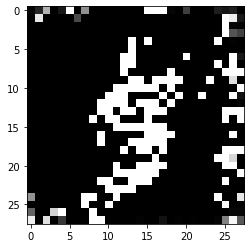

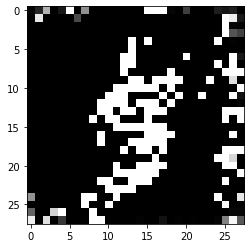

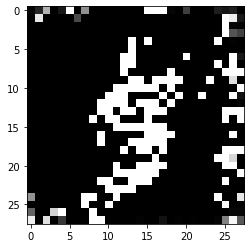

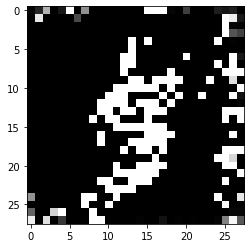

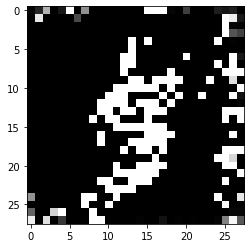

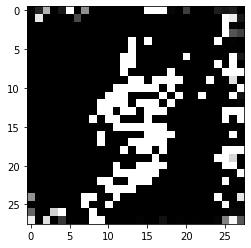

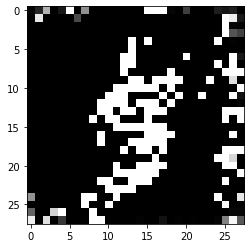

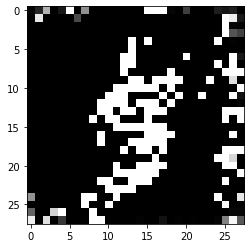

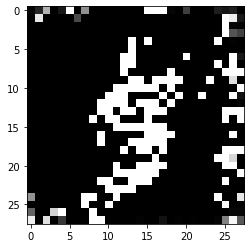

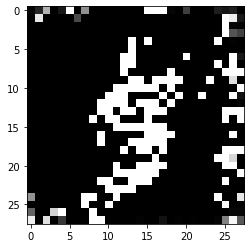

In [29]:
examples = generator(torch.rand(10, 100))

for i in range(10):
    MnistData.display(examples[i], scale=True)